Robert Garbutt  
Section 101

# Homework 4: File I/O, Statistics

**Submit this notebook to bCourses to receive a grade for this Homework.**

Please complete homework activities in code cells in this iPython notebook. Be sure to comment your code well so that anyone who reads it can follow it and use it. Enter your name in the cell at the top of the notebook. When you are ready to submit it, you should download it as a python notebook (click "File", "Download as", "Notebook (.ipynb)") and upload it on bCourses under the Assignments tab.

For questions that ask you to make an interpretation, please write a sentence or two explaining your response. You can use "Markdown" language to create a cell (like this one) which is ordinary text instead of using code. To do this, create a new cell, and then look at the bar above which has a picture of a floppy disk. On the right side is a drop down menu that allows you change whether a cell is "Markdown" or "Code".

## Problem 1: Central Limit Theorem

Here we will verify the Central Limit Theorem and reproduced a plot I showed in class (https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:Dice_sum_central_limit_theorem.svg)

1. Write a function that returns $n$ integer random numbers, uniformly disributed between 1 and 6, inclusively. This represents $n$ throws of a fair 6-sided die. The value that comes up at each throw will be called the "score".
1. Generate a distribution of 1000 dice throws and plot it as a  histogram normalized to unit area. Compute the mean $\mu_1$ and standard deviation $\sigma_1$ of this distribution. Compare your numerical result to the analytical calculation. 
1. Generate 1000 sets of throws of $N=2,3,4,5,10$ dice, computing the total sum of dice scores for each set. For each value of $N$, plot the distribution of total scores, and compute the mean $\mu_N$ and standard deviation $\sigma_N$ of each distribution. This should be similar to the plot at the link above.
1. Plot the standard deviation $\sigma_N$ as a function of $N$. Does it follow the Central Limit Theorem? 

Mean of 1000 throws of 1 die = 3.509
Std deviation of 1000 throws of 1 die = 1.7429627075758105
Sum of dice throws= 3509

Mean of 1000 throws of 2 die = 7.021
Std deviation of 1000 throws of 2 die = 2.4129979278897027
Sum of dice throws= 7021

Mean of 1000 throws of 3 die = 10.327
Std deviation of 1000 throws of 3 die = 2.984304106487809
Sum of dice throws= 10327

Mean of 1000 throws of 4 die = 14.086
Std deviation of 1000 throws of 4 die = 3.464188793931416
Sum of dice throws= 14086

Mean of 1000 throws of 5 die = 17.533
Std deviation of 1000 throws of 5 die = 3.866382159073259
Sum of dice throws= 17533

Mean of 1000 throws of 10 die = 35.057
Std deviation of 1000 throws of 10 die = 5.552814691667641
Sum of dice throws= 35057



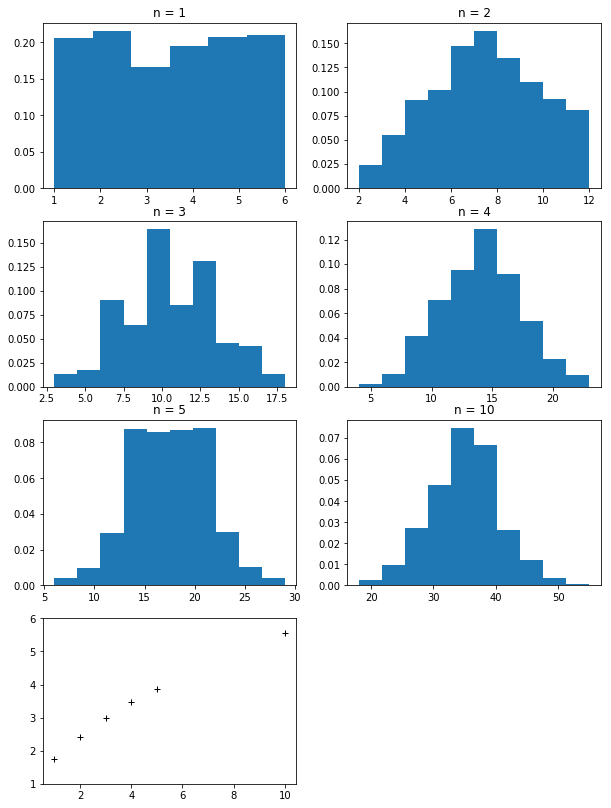

In [35]:
import numpy as np
import matplotlib.pyplot as plt

trials = 1000

def score(n):
    return np.random.randint(1,7, size=n)



def dice_rolls(dice_number):   #Generates array of throws depending on number of dice.
    i=1
    roll = score(trials)
    while i < dice_number:
        roll += score(trials)
        i+=1
    return roll

def value_calc(array,throws): #Gives the required print statements.
    if throws == 1:
        print('Mean of 1000 throws of 1 die =',np.mean(array))
        print('Std deviation of 1000 throws of 1 die =',np.std(array))
        print('Sum of dice throws=',sum(array))
        print()
    else:
        print('Mean of 1000 throws of', throws, 'die =',np.mean(array))
        print('Std deviation of 1000 throws of',throws, 'die =',np.std(array)) 
        print('Sum of dice throws=',sum(array))
        print()

one_die = dice_rolls(1)      #Arrays of the corresponding sums
two_dice = dice_rolls(2)
three_dice = dice_rolls(3)
four_dice = dice_rolls(4)
five_dice = dice_rolls(5)
ten_dice = dice_rolls(10)


value_calc(one_die,1)             
value_calc(two_dice,2)
value_calc(three_dice,3)
value_calc(four_dice,4)
value_calc(five_dice,5)
value_calc(ten_dice,10)



plt.figure(figsize=(10,14))
plt.tight_layout()

plt.subplot(421)
plt.hist(one_die,bins = 6, density=True)
plt.title('n = 1')

plt.subplot(422)
plt.hist(two_dice, density=True)
plt.title('n = 2')

plt.subplot(423)
plt.hist(three_dice, density=True)
plt.title('n = 3')

plt.subplot(424)
plt.hist(four_dice, density=True)
plt.title('n = 4')

plt.subplot(425)
plt.hist(five_dice, density=True)
plt.title('n = 5')

plt.subplot(426)
plt.hist(ten_dice, density=True)
plt.title('n = 10')

plt.subplot(427)

plt.ylim(1,6)
plt.plot(1,np.std(one_die),'k+')
plt.plot(2,np.std(two_dice),'k+')
plt.plot(3,np.std(three_dice),'k+')
plt.plot(4,np.std(four_dice),'k+')
plt.plot(5,np.std(five_dice),'k+')
plt.plot(10,np.std(ten_dice),'k+')

plt.show()

print('It does not seem to follow the Central Limit Theorem since the ratio of the standard deviation to the number of dice is decreasing and approaching 6')

## Problem 2: Parity-Violating Asymmetry

The data sample for this problem comes from the <a href="http://www.slac.stanford.edu/exp/e158">E158</a> experiment at SLAC (a national lab near that Junior university across the Bay). E158 measured a parity-violating asymmetry in Møller (electron-electron) scattering. This was a fixed-target experiment, which scattered longitudinally-polarized electrons off atomic (unpolarized) electrons in the 1.5m liquid hydrogen target. The data below contains a snapshot of 10,000 "events" from this experiment (overall, the experiment collected almost 400 million such events over the course of about 4 months). Each event actually records a pair of pulses: one for the right-handed electron (spin pointing along momentum) and one for the left-handed electron. For each event, we record 4 variables:

* Counter: event index
* Asymmetry: "raw" cross section asymmetry $A_{raw}$ from one of the detector channels (there are 50 of these overall). The cross section asymmetry is defined as 
$A_{raw} = \frac{\sigma_R-\sigma_L}{\sigma_R+\sigma_L}$
The asymmetry is recorded in units of PPM (parts per million). It is called "raw" because corrections due to the difference in beam properties at the target are not yet applied.
* DeltaX: difference in beam position $\Delta X=X_R-X_L$ at the target in X direction in microns (with the convention that the beam is traveling along Z)
* DeltaY: difference in beam position $\Delta Y=Y_R-Y_L$ at the target in Y direction in microns

The data sample is provided in plain text format as the file <tt>asymdata.txt</tt>. Questions for this analysis:

1. Read the data from the file, and plot distributions of $A_{raw}$, $\Delta X$, and $\Delta Y$. 
1. Compute the mean of the raw asymmetry distribution and its statistical uncertainty.
1. Plot $A_{raw}$ vs $\Delta X$, $A_{raw}$ vs $\Delta Y$, and $\Delta X$ vs $\Delta Y$ as scatter plots. 
1. Compute the correlation coefficients <tt>Corr(Asym,DeltaX)</tt>, <tt>Corr(Asym,DeltaY)</tt>, and <tt>Corr(DeltaX,DeltaY)</tt>. See lecture notes, Workshop06 or https://en.wikipedia.org/wiki/Pearson_correlation_coefficient for additional help understanding correlation coefficients. Which variables are approximately independent of each other ?

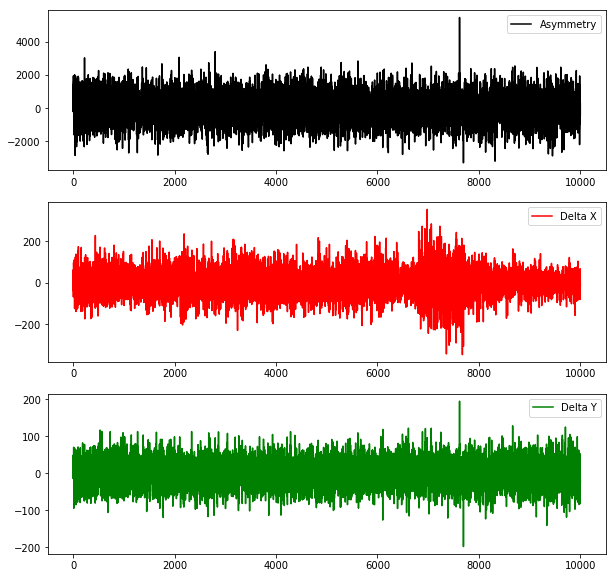

Mean of raw asymmetry distribution = 0.44301452999999963
Standard deviation of raw asymmetry distribution = 848.8533302673662


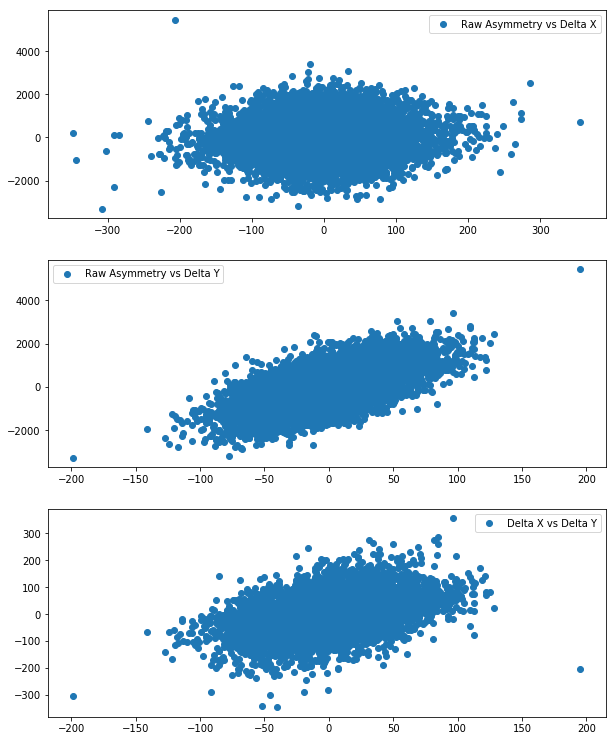

Correlation between A_raw and Delta X: 0.05639276423703878
Correlation between A_raw and Delta Y: 0.6475434676821319
Correlation between Delta X and Delta Y: 0.4021285912819623
Out of the three correlations, the Asymmetry and Delta X data are very nearly independent.


In [63]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('asymdata.txt', skiprows=1)
plt.figure(1, figsize=(10,10))

A_raw = data[:,1]
Delta_X = data[:,2]
Delta_Y = data[:,3]

plt.subplot(311)
plt.plot(A_raw, 'k')
plt.legend(['Asymmetry'])

plt.subplot(312)
plt.plot(Delta_X, 'r')
plt.legend(['Delta X'])

plt.subplot(313)
plt.plot(Delta_Y, 'g')
plt.legend(['Delta Y'])
plt.show()

print('Mean of raw asymmetry distribution =',np.mean(data[:,1]))
print('Standard deviation of raw asymmetry distribution =',np.std(data[:,1]))

plt.figure(2, figsize=(10, 13))

plt.subplot(311)
plt.scatter(Delta_X, A_raw)
plt.legend(['Raw Asymmetry vs Delta X'])

plt.subplot(312)
plt.scatter(Delta_Y, A_raw)
plt.legend(['Raw Asymmetry vs Delta Y'])

plt.subplot(313)
plt.scatter(Delta_Y, Delta_X)
plt.legend(['Delta X vs Delta Y'])

plt.show()

print('Correlation between A_raw and Delta X:',np.corrcoef(A_raw, Delta_X)[0,1])
print('Correlation between A_raw and Delta Y:',np.corrcoef(A_raw, Delta_Y)[0,1])
print('Correlation between Delta X and Delta Y:',np.corrcoef(Delta_Y, Delta_X)[0,1])
print('Out of the three correlations, the Asymmetry and Delta X data are very nearly independent.')

## Problem 3: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident.]

You are given a dataset (`peak.dat`) from a gamma-ray experiment consisting of ~1000 gamma-ray hits. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray (in MeV). We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Compute the mean and standard deviation of the distribution of energies and their statistical uncertainties. Assume the distribution is Gaussian and see the lecture notes for the formulas for the mean and variance of the sample and the formulas for the errors on these quantities. 
1. Compute the fraction of events contained within $\pm 1\sigma$ of the mean, $\pm 2\sigma$ of the mean, and $\pm 3\sigma$ of the mean (where $\sigma$ is the standard deviation you computed in Part 2). Compare these fractions with the quantiles of the Gaussian distribution (see lecture notes) ? 


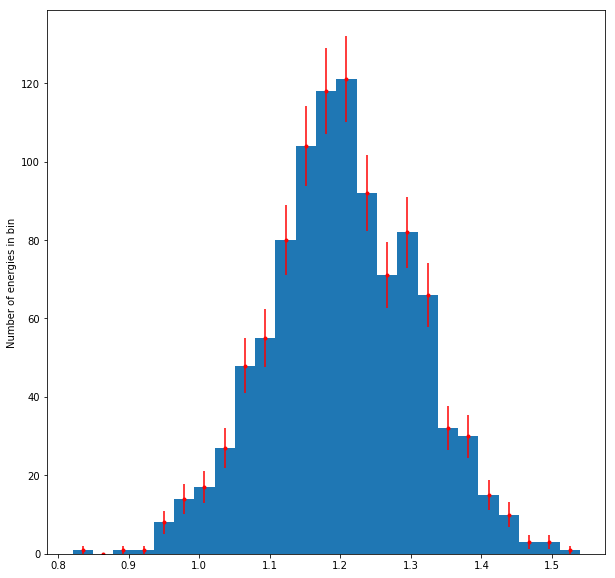

Mean of distribution: 1.202680265 , standard deviation: 0.10378512460600878 and variance: 0.01077135208948477
Fraction of events within 1 standard deviation of the peak: 0.684
Fraction of events within 2 standard deviations of the peak: 0.951
Fraction of events within 3 standard deviations of the peak: 0.998


In [20]:
import numpy as np
import matplotlib.pyplot as plt

energies = np.loadtxt('peak.dat')


plt.figure(figsize=(10,10))

hist, bin_edges,patches = plt.hist(energies, bins=25)

x = 0.5*(bin_edges[1:] + bin_edges[:-1])   #Error bars
err_y = np.sqrt(hist)
plt.errorbar(x, hist, err_y, fmt='r.')
plt.ylabel('Number of energies in bin')

plt.show()

mean = np.mean(energies)
variance = 0
for value in energies:
    variance += (value - mean)**2 / len(energies)
std = np.sqrt(variance)

print('Mean of distribution:', mean, ', standard deviation:', std,'and variance:',variance)



def fraction_of_events(x):
    counter = 0
    for values in energies:
            if values> (mean-x*std) and (values < mean+x*std):
                counter += 1
    return counter/len(energies)

print('Fraction of events within 1 standard deviation of the peak:',fraction_of_events(1))
print('Fraction of events within 2 standard deviations of the peak:',fraction_of_events(2))
print('Fraction of events within 3 standard deviations of the peak:',fraction_of_events(3))
